In [1]:

import numpy as np
import segyio
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ipywidgets import Button, HBox, VBox

import matplotlib
import warnings
warnings.filterwarnings('ignore')
import glob

from mpl_toolkits.mplot3d import Axes3D
from skimage.transform import rescale 
from mayavi import mlab
#from scipy import ndimage

import Functions

#plt.rcParams["figure.figsize"] = (10,5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#%matplotlib inline
%matplotlib notebook
sourcefile='D:/small.sgy'
sourcefile='D:/Vawn.SGY'
sourcefile="C:/Users/koushb/OneDrive - Husky Energy/ML/ML_S_Int/For GoogleML data/data/Cropped SGY/DV.sgy"




filter_files=['None']


for file in glob.glob(".\\filters\\*.npz"):
    filter_files.append(file)

 



 

In [2]:
src=segyio.open(sourcefile)


vol=[]
for inline in src.ilines:
    vol.append(np.array(src.iline[inline]).T)
vol=np.array(vol)
vol=np.swapaxes(vol,0,1)
vol=np.swapaxes(vol,0,2)

volumes=[vol]

ilines=src.ilines
xlines=src.xlines
TimeSamples=src.samples

src.close()

#np_s=readsegy(sourcefile)

il_min=ilines[0]
il_max=ilines[-1]

xl_min=xlines[0]
xl_max=xlines[-1]


z_min=TimeSamples[0]
z_max=TimeSamples[-1]

In [3]:

def il_plot(clear=False):
    #tt=np.array(src.iline[inline]).T
    global volumes
    inline_ind=il_Slider.index
    cmap=colormap.value
    #interp_method=interpolation
    #print(select_realize.index)
    vol=volumes[select_realize.index]
    t=vol[:,inline_ind,:].copy().T
    
    #print(t.shape,tt.shape)
    #print(np.sum((t-tt)**2))
    #t=tt.copy()
    
    s=resizefactor
    if s>1:
        t=rescale(t, 1/s, anti_aliasing=False)
        
        
    if filters.value != 'None':
        t=Functions.do_filter(t,filters.value)


    if attribute.value != "None":
        t=Functions.calc_att(t,TimeSamples,attribute.value,att_par.value)

    
    if auto_scale:
        vmin.value=t.min()
        vmax.value=t.max()    
    if clear:
        plt.clf()
        
    #print(inline,inline_ind)

    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value,extent=[xl_min,xl_max,z_max,z_min])
    plt.axes().set_aspect(1/vert_ex)
    plt.title('in line: '+str(il_Slider.value))

    if clear and showlegend:

        plt.colorbar()
    
    
    
def xl_plot(clear=False):
    global volumes
    xline_ind=xl_Slider.index    
    cmap=colormap.value
    #interp_method=interpolation.value
    vol=volumes[select_realize.index]
    t=vol[xline_ind,:,:].copy().T
    
    #xline=xl_Slider.value
    #tt=np.array(src.xline[xline]).T
    #tt=vol[:,inline_ind,:].T
    #print(np.sum((t-tt)**2))
    
    s=resizefactor
    if s>1:
        t=rescale(t, 1/s, anti_aliasing=False)
    
    if filters.value != "None":
        t=Functions.do_filter(t,filters.value)

    if attribute.value != "None":
        t=Functions.calc_att(t,TimeSamples,attribute.value,att_par.value)

    
    if auto_scale:
        vmin.value=t.min()
        vmax.value=t.max()

    if clear:
        plt.clf()
    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value,extent=[il_min,il_max,z_max,z_min])
    plt.axes().set_aspect(1/vert_ex)
    plt.title('cross line: '+str(xl_Slider.value))
    if clear and showlegend:
        plt.colorbar()
    #plt.show()

    
    
def z_plot(clear=False):
    global volumes
    z_ind=z_Slider.index    
    cmap=colormap.value
    #interp_method=interpolation.value
    vol=volumes[select_realize.index]
    t=vol[:,:,z_ind].copy().T
    
    #z=z_Slider.value
    #print(z)
    #tt=np.array(src.depth_slice[z_ind])
    #print(np.sum((t-tt)**2))
    
    s=resizefactor
    if s>1:
        t=rescale(t, 1/s, anti_aliasing=False)
    
    if filters.value != 'None':
        t=Functions.do_filter(t,filters.value)
        
    if auto_scale:
        vmin.value=t.min()
        vmax.value=t.max()

    if attribute.value != "None":
        t=Functions.calc_att(t,TimeSamples,attribute.value,att_par.value)

    
    #plt.figure('Time Slice')
    
    if clear:
        plt.clf()
    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value,extent=[xl_min,xl_max,il_min,il_max])
    plt.axes().set_aspect(1)
    plt.title('Time Slice: '+str(z_Slider.value))
    if clear and showlegend:
        plt.colorbar()

def t_plot():
    global volumes
    inline_ind=il_Slider.index
    xline_ind=xl_Slider.index    
    cmap=colormap.value
    #interp_method=interpolation.value
    vol=volumes[select_realize.index]
    #t=vol[xline_ind,:,:].T
    
    #print(inline,xline)

    
    trace=vol[inline_ind,xline_ind,:].copy()
    
    #s=resizefactor
    #if s>1:
    #    trace=rescale(trace, 1/s, anti_aliasing=False)
    
    if filters.value != 'None':
        trace=Functions.do_filter(trace,filters.value)


    if attribute.value != "None":
        #print(trace.ndim,att_par.value)
        trace=Functions.calc_att(trace,TimeSamples,attribute.value,att_par.value)
        
        
    
    if auto_scale:
        vmin.value=trace.min()
        vmax.value=trace.max()

    
    plt.clf()
    plt.plot(trace,TimeSamples)    
    plt.xlim(vmin.value,vmax.value)
    plt.ylim(TimeSamples[-1],TimeSamples[0])
    plt.axes().set_aspect('auto')     
    plt.title('in line: '+str(il_Slider.value)+', x line: '+str(xl_Slider.value))


def plot_3D(clear=False):#inline,xline,z,
    global volumes
    
    s=resizefactor
    #inline_ind=inline-il_min
    #xline_ind=xline-xl_min
    inline_ind=il_Slider.index
    xline_ind=xl_Slider.index  
    z_ind=z_Slider.index   
    
    cmap=colormap.value
    
    
    #z_ind=z-z_min
    vol=volumes[select_realize.index].copy()
    grid = mlab.pipeline.scalar_field(vol)
    grid.spacing = [1, 1.0, 1/s]

    mlab.pipeline.image_plane_widget(grid,
                                plane_orientation='x_axes',
                                slice_index=inline_ind,
                                colormap=cmap
                            )
    mlab.pipeline.image_plane_widget(grid,
                                plane_orientation='y_axes',
                                slice_index=xline_ind,
                                colormap=cmap
                            )
    mlab.pipeline.image_plane_widget(grid,
                                plane_orientation='z_axes',
                                slice_index=z_ind,
                                colormap=cmap
                            )
    mlab.outline()
    mlab.show()

    
    
 
#https://gis.stackexchange.com/questions/200180/convert-and-plot-python-basemap-and-netcdf-file-in-utm-zone-45n/201155

In [4]:

select_realize=widgets.Dropdown(
    options=['original'],
    value='original',
    description='Select Seismic Volume',
    disabled=False,
    style={'description_width': 'initial'}
)

realizeit = widgets.Button(description="Realize")
realizename=widgets.Text(
    value='Realize 1',
    placeholder='Type something',
    description='String:',
    disabled=False
)


#itrace=widgets.Checkbox(value=False,description='Plot Trace',disabled=False,indent=False)
#c_update=widgets.Checkbox(value=False,description='Continuous Update',disabled=False,indent=False)
#auto_scale=widgets.Checkbox(value=False,description='Auto Color Scale',disabled=False,indent=False)

il_Slider= widgets.SelectionSlider(options=ilines,description='Inline',continuous_update=False)
xl_Slider= widgets.SelectionSlider(options=xlines,description='Xline',continuous_update=False)
z_Slider = widgets.SelectionSlider(options=TimeSamples,description='Zline',continuous_update=False)

#resizefactor=widgets.IntSlider(min=1, max=100, value=1, description='Resize Fac.',continuous_update=False)
vmin     = widgets.IntSlider(min=-40000, max=40000, value=-40000, description='Amp. Min',continuous_update=False)
vmax     = widgets.IntSlider(min=-40000, max=40000, value=40000, description='Amp. Max',continuous_update=False)
#vert_ex  = widgets.IntSlider(min=1, max=100, value=10, description='Ver. Exag.',continuous_update=False)
att_par  = widgets.SelectionSlider(options=range(360), value=0, description='Att. Par.',continuous_update=False,disabled=True)

colormap=widgets.Dropdown(
    options=['seismic','viridis', 'plasma', 'inferno', 'magma', 'cividis','Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'twilight', 'twilight_shifted', 'hsv','Pastel1', 'Pastel2', 'Paired', 'Accent','Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
            ],
    value='seismic',
    description='Colormap',
    disabled=False,
)



#interpolation=widgets.Dropdown(
#    options=['nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'],
#    value='bilinear',
#    description='Interpolation',
#    disabled=False,
#)


attribute=widgets.Dropdown(
    options=['None', 'Phase Shift', 'Low Pass','High Pass','Edge Detection', 
           'CumulativeSum', 'FirstDerivative', 'InstanEnvelop', 'InstanQuadrature', 'InstanPhase', 'InstanFrequency',
           'InstanCosPhase'],
    value='None',
    description='Attributes',
    disabled=False,
)




filters=widgets.Dropdown(
    options=filter_files,
    value='None',
    description='Filters',
    disabled=False,
)


graphtype=widgets.RadioButtons(
    options=['1D', '2D', '3D'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Type',
    value='2D',
    disabled=False
)


In [5]:

t=0

def plotem(clear=False):
    if graphtype.value=='1D':
        t_plot()
    elif graphtype.value=='2D':        
        if t==1:
            il_plot(clear=clear)
        elif t==2:
            xl_plot(clear=clear) 
        else:
            z_plot(clear=clear)
    else:
        #print('3D')
        plot_3D(clear=True)
        

#il_Slider= widgets.IntSlider(min=il_min,max=il_max,description='Inline')
def on_value_change(change):  
    global t
    #print(t,change)
    #return()
    #print(change['owner'].description)
    if change['owner'].description=='Type':
        #print(graphtype.value,t)
        if graphtype.value=='1D':
            t_plot()
            t=0
        elif graphtype.value=='2D':
            il_plot(clear=True)
            t=1
        else:
            #print('3D')
            plot_3D(clear=True)
            
#    if itrace.value:
#        t_plot(il_Slider.value,xl_Slider.value)
#        t=0
#    elif change['owner'].description=='Plot Trace':         #this is when we uncheck trace            
#        il_plot(il_Slider.value,colormap.value,interpolation.value,clear=True)
        #print('what?')
    elif change['owner'].description=='Inline':
        if t==1:
            c=False
        else:
            c=True
        
        #il_plot(change['owner'].value,colormap.value,interpolation.value,clear=c)
        t=1
        plotem(c)
    elif change['owner'].description=='Xline':
        if t==2:
            c=False
        else:
            c=True
        
        #xl_plot(change['owner'].value,colormap.value,interpolation.value,clear=c)
        t=2
        plotem(c)
    elif change['owner'].description=='Zline':
        if t==3:
            c=False
        else:
            c=True
        
        #z_plot(change['owner'].index,colormap.value,interpolation.value,clear=c)
        t=3
        plotem(c)
    if change['owner'].description=='Colormap' or change['owner'].description=='Amp. Min'or \
    change['owner'].description=='Amp. Max' or change['owner'].description=='Att. Par.' or \
    change['owner'].description=='Resize Fac.' or change['owner'].description=='Select Seismic Volume':
        #print(change['owner'].description)
        if t==1:
            il_plot(clear=True)
        elif t==2:
            xl_plot(clear=True)
        elif t==3:
            z_plot(clear=True)
    elif  change['owner'].description=='Interpolation':
        if t==1:
            il_plot()
        elif t==2:
            xl_plot()
        elif t==3:
            z_plot()
    elif  change['owner'].description=='Filters':#or change['owner'].description=='Ver. Exag.':
        #print(change['owner'].description,t)
        if t==0:
            t_plot()
        if t==1:
            il_plot()
        elif t==2:
            xl_plot()
        elif t==3:
            z_plot()    
            
    elif  change['owner'].description=='Attributes':     
        #print(attribute.value)
        if attribute.value=='Phase Shift':

            att_par.disabled = False
            att_par.options=range(360)

            att_par.observe(on_value_change,names=['value'])
        elif attribute.value=='Low Pass' or attribute.value=='High Pass' :
            att_par.disabled = False
            att_par.options=range(1,500)

        else:
            #print('disable degree')
            att_par.disabled = True
            #att_par.unobserve_all()
            #print('att_par unobserve')
            
        
        if t==0:
            t_plot()
        if t==1:
            il_plot()
        elif t==2:
            xl_plot()
        elif t==3:
            z_plot()    

        
        
    else:    
        #print('none: ',change['owner'].description)
        pass

def auto_scale_value_change(change):
    
    if auto_scale.value:
        vmin.disabled=True
        vmax.disabled=True
        vmin.unobserve_all()
        vmax.unobserve_all()
    else:
        
        vmin.disabled=False
        vmax.disabled=False
        vmin.observe(on_value_change,names=['value'])
        vmax.observe(on_value_change,names=['value'])

def on_realizeit(change):
    #print('realize')
    global volumes
    select_realize.options = (*select_realize.options, realizename.value)
    #select_realize.options=select_realize.options+(realizename.value)
    vol=volumes[select_realize.index].copy()
    
    if filters.value != 'None':
        vol=Functions.do_filter(vol,filters.value)
        

    if attribute.value != "None":
        vol=Functions.calc_att(vol,TimeSamples,attribute.value,att_par.value)
        


    volumes.append(vol)
        
graphtype.observe(on_value_change,names=['value'])    
#itrace.observe(on_value_change,names=['value'])
il_Slider.observe(on_value_change, names='value')
xl_Slider.observe(on_value_change, names='value')
z_Slider.observe(on_value_change, names='value')
vmin.observe(on_value_change,names=['value'])
vmax.observe(on_value_change,names=['value'])
colormap.observe(on_value_change,names=['value'])
#interpolation.observe(on_value_change,names=['value'])
#vert_ex.observe(on_value_change,names=['value'])
#c_update.observe(on_value_change,names=['value'])
filters.observe(on_value_change,names=['value'])
attribute.observe(on_value_change,names=['value'])
#auto_scale.observe(auto_scale_value_change,names=['value'])
att_par.observe(on_value_change,names=['value'])
#resizefactor.observe(on_value_change,names=['value'])
select_realize.observe(on_value_change,names=['value'])
realizeit.on_click(on_realizeit)


#iBP=widgets.Checkbox(value=False,description='band pass',disabled=False)
#LB= widgets.IntSlider(min=1, max=200, value=0, description='low band')
#HB= widgets.IntSlider(min=1, max=200, value=200, description='high band')

#iBP.observe(on_value_change,names=['value'])
#LB.observe(on_value_change,names=['value'])
#HB.observe(on_value_change,names=['value'])



In [6]:
# some options
c_update=False
il_Slider.continuous_update=c_update
xl_Slider.continuous_update=c_update
z_Slider.continuous_update=c_update
vmin.continuous_update=c_update
vmax.continuous_update=c_update
#vert_ex.continuous_update=c_update
att_par.continuous_update=c_update

auto_scale=False
if auto_scale:
    vmin.disabled=True
    vmax.disabled=True
    vmin.unobserve_all()
    vmax.unobserve_all()
else:
    vmin.disabled=False
    vmax.disabled=False
    vmin.observe(on_value_change,names=['value'])
    vmax.observe(on_value_change,names=['value'])

    
    
resizefactor=1    
interp_method='bilinear'#'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'

showlegend=False
vert_ex=10

<IPython.core.display.Javascript object>


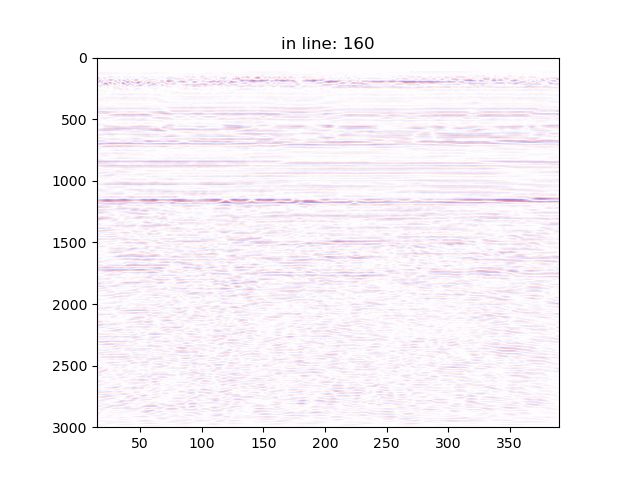

In [7]:

#v1=VBox([c_update,auto_scale])#itrace,
h1=HBox([select_realize,realizeit,realizename])

v1=VBox([il_Slider,xl_Slider,z_Slider])
v2= VBox([colormap,vmin,vmax])
h2=HBox([graphtype,v1,v2])#v1,resizefactor

#h1 = HBox([itrace,c_update,auto_scale])
#h2= HBox([,])
h3 = HBox([filters,attribute,att_par])#interpolation,

#h5= HBox([])
#h6= HBox([realizeit,realizename])
display(h1,h2,h3)

#right_box = VBox([items[2], items[3]])
#HBox([left_box, right_box])

#display(itrace,il_Slider,xl_Slider,z_Slider,colormap,interpolation,vmin,vmax,filters)#iBP,LB,HB,
il_plot(clear=True)
t=1
#display(xl_Slider,colormap,interpolation)
#xl_plot(src.xlines[0],colormap.value,interpolation.value,changecmap=True)
#display(z_Slider,colormap,interpolation)
#z_plot(0,colormap.value,interpolation.value,changecmap=True)